### Error analysis

Error analysis is particularly useful in finding where is model does mistakes and inturn provides some
strategies to improve model performance

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import utils
import json

In [6]:
with open('classes_list.json', 'r') as fp:
    classes_list = json.load(fp)

In [7]:
classes_list

['Bread',
 'Dairyproduct',
 'Dessert',
 'Egg',
 'Friedfood',
 'Meat',
 'NoodlesPasta',
 'Rice',
 'Seafood',
 'Soup',
 'VegetableFruit']

In [8]:
training_samples_class = {}
validation_samples_class = {}

In [10]:
for i in range(11):
    training_samples_class[classes_list[i]] = len(os.listdir('./training/' + str(classes_list[i])))
    validation_samples_class[classes_list[i]] = len(os.listdir('./validation/' + str(classes_list[i])))

In [11]:
training_samples_class

{'Bread': 994,
 'Dairyproduct': 429,
 'Dessert': 1500,
 'Egg': 986,
 'Friedfood': 848,
 'Meat': 1325,
 'NoodlesPasta': 440,
 'Rice': 280,
 'Seafood': 855,
 'Soup': 1500,
 'VegetableFruit': 709}

In [12]:
validation_samples_class

{'Bread': 362,
 'Dairyproduct': 144,
 'Dessert': 500,
 'Egg': 327,
 'Friedfood': 326,
 'Meat': 449,
 'NoodlesPasta': 147,
 'Rice': 96,
 'Seafood': 347,
 'Soup': 500,
 'VegetableFruit': 232}

### Load InceptionV3 model

The InceptionV3 model shown to perform best on this dataset as compared with the vgg19 and mobilenet architechture. The model has shown results :<br>

Training accuracy:- 0.8337<br>
Validation accuracy:- 0.8233<br>
Test accuracy:- 0.8530<br>

Error in training data:- 0.1663 => 16.63%<br>
Error in validation data:- 0.1767 => 17.67%<br>
Error in test data:- 0.1470 => 14.70%<br>

### Lets create a dataframe

Create a dataframe which stores the results in format:<br>

Rows => No of classes<br>
Columns => [Total training samples, Proportion of training  data, Correctly classified, Wrongly classified, Training accuracy, % Error, % contrib to total error, Total validation samples, Proportion of validation data, Correctly classified, Wrongly classified, Validation accuracy, % Error , % contrib to total error]<br><br>
Total rows => NUM_CLASSES => 11<br>
Total columns => 14<br>

In [13]:
model = tf.keras.models.load_model('./models/inceptionV3-regularized-04-0.83.hdf5')

In [14]:
model_analysis = np.zeros((len(classes_list), 14))

In [15]:
# Adding total training and validation samples per class to df
model_analysis[:, 0] = list(training_samples_class.values())
model_analysis[:, 7] = list(validation_samples_class.values())

In [16]:
total_training_samples = sum(list(training_samples_class.values()))
total_validation_samples = sum(list(validation_samples_class.values()))

In [17]:
# Find % contribution of data per class in the total data
model_analysis[:, 1] = model_analysis[:, 0]
model_analysis[:, 1] = model_analysis[:, 1]*100 / total_training_samples
model_analysis[:, 8] = model_analysis[:, 7]
model_analysis[:, 8] = model_analysis[:, 8]*100 / total_validation_samples

In [49]:
def correctly_classified(directory):
    
    pred_count = {}
    
    for target in classes_list:
        pred_count[target] = 0
    
    for target in classes_list:
        
        print("Predicting for class: {}".format(target))
        images_list = os.listdir(directory + target)
    
        for img in images_list:
            
            image = tf.keras.preprocessing.image.load_img(directory + target + '/' + img, target_size=(300, 300))
            image = tf.keras.preprocessing.image.img_to_array(image)
            
            image = image.reshape(1, 300, 300, 3)
            image = tf.keras.applications.vgg19.preprocess_input(image)
            image = image / 255
            
            pred = np.argmax(model.predict(image))
            
            if classes_list[pred] == target:
                pred_count[target] = pred_count[target] + 1
                
                
    return pred_count

In [50]:
%%time
training_correctly_predicted = correctly_classified('./training/')

Predicting for class: Bread
Predicting for class: Dairyproduct
Predicting for class: Dessert
Predicting for class: Egg
Predicting for class: Friedfood
Predicting for class: Meat
Predicting for class: NoodlesPasta
Predicting for class: Rice
Predicting for class: Seafood
Predicting for class: Soup
Predicting for class: VegetableFruit
Wall time: 21min 46s


In [51]:
training_correctly_predicted

{'Bread': 829,
 'Dairyproduct': 375,
 'Dessert': 1336,
 'Egg': 762,
 'Friedfood': 747,
 'Meat': 1203,
 'NoodlesPasta': 420,
 'Rice': 266,
 'Seafood': 794,
 'Soup': 1464,
 'VegetableFruit': 699}

In [52]:
validation_correctly_predicted = correctly_classified('./validation/')

Predicting for class: Bread
Predicting for class: Dairyproduct
Predicting for class: Dessert
Predicting for class: Egg
Predicting for class: Friedfood
Predicting for class: Meat
Predicting for class: NoodlesPasta
Predicting for class: Rice
Predicting for class: Seafood
Predicting for class: Soup
Predicting for class: VegetableFruit


In [53]:
validation_correctly_predicted

{'Bread': 290,
 'Dairyproduct': 94,
 'Dessert': 423,
 'Egg': 230,
 'Friedfood': 254,
 'Meat': 392,
 'NoodlesPasta': 138,
 'Rice': 91,
 'Seafood': 302,
 'Soup': 472,
 'VegetableFruit': 221}

In [54]:
training_correct_list = list(training_correctly_predicted.values())
validation_correct_list = list(validation_correctly_predicted.values())

In [57]:
model_analysis[:, 2] = np.array(training_correct_list)
model_analysis[:, 9] = np.array(validation_correct_list)

In [61]:
model_analysis = pd.DataFrame(model_analysis, columns=['train_samples_count', 'proportion_training', 'train_correctly_classified', 'train_wrongly_classified', 'train_acc_class', 'train_error', 'train_contrib_error', 'val_samples_count', 'proportion_validation', 'val_correctly_classified', 'val_wrongly_classified', 'val_acc_class', 'val_error', 'val_contrib_error'])

In [62]:
model_analysis.head()

,train_samples_count,proportion_training,train_correctly_classified,train_wrongly_classified,train_acc_class,train_error,train_contrib_error,val_samples_count,proportion_validation,val_correctly_classified,val_wrongly_classified,val_acc_class,val_error,val_contrib_error
0,994.0,10.075005,829.0,0.0,0.0,0.0,0.0,362.0,10.553936,290.0,0.0,0.0,0.0,0.0
1,429.0,4.348267,375.0,0.0,0.0,0.0,0.0,144.0,4.198251,94.0,0.0,0.0,0.0,0.0
2,1500.0,15.203730,1336.0,0.0,0.0,0.0,0.0,500.0,14.577259,423.0,0.0,0.0,0.0,0.0
3,986.0,9.993919,762.0,0.0,0.0,0.0,0.0,327.0,9.533528,230.0,0.0,0.0,0.0,0.0
4,848.0,8.595175,747.0,0.0,0.0,0.0,0.0,326.0,9.504373,254.0,0.0,0.0,0.0,0.0


In [63]:
model_analysis['train_wrongly_classified'] = model_analysis['train_samples_count'] - model_analysis['train_correctly_classified']
model_analysis['val_wrongly_classified'] = model_analysis['val_samples_count'] - model_analysis['val_correctly_classified']

In [64]:
model_analysis['train_acc_class'] = model_analysis['train_correctly_classified'] / model_analysis['train_samples_count']
model_analysis['val_acc_class'] = model_analysis['val_correctly_classified'] / model_analysis['val_samples_count']

In [65]:
model_analysis.head()

,train_samples_count,proportion_training,train_correctly_classified,train_wrongly_classified,train_acc_class,train_error,train_contrib_error,val_samples_count,proportion_validation,val_correctly_classified,val_wrongly_classified,val_acc_class,val_error,val_contrib_error
0,994.0,10.075005,829.0,165.0,0.834004,0.0,0.0,362.0,10.553936,290.0,72.0,0.801105,0.0,0.0
1,429.0,4.348267,375.0,54.0,0.874126,0.0,0.0,144.0,4.198251,94.0,50.0,0.652778,0.0,0.0
2,1500.0,15.203730,1336.0,164.0,0.890667,0.0,0.0,500.0,14.577259,423.0,77.0,0.846000,0.0,0.0
3,986.0,9.993919,762.0,224.0,0.772819,0.0,0.0,327.0,9.533528,230.0,97.0,0.703364,0.0,0.0
4,848.0,8.595175,747.0,101.0,0.880896,0.0,0.0,326.0,9.504373,254.0,72.0,0.779141,0.0,0.0


In [66]:
model_analysis['train_error'] = 1 - model_analysis['train_acc_class']
model_analysis['val_error'] = 1 - model_analysis['val_acc_class']

In [67]:
model_analysis.head()

,train_samples_count,proportion_training,train_correctly_classified,train_wrongly_classified,train_acc_class,train_error,train_contrib_error,val_samples_count,proportion_validation,val_correctly_classified,val_wrongly_classified,val_acc_class,val_error,val_contrib_error
0,994.0,10.075005,829.0,165.0,0.834004,0.165996,0.0,362.0,10.553936,290.0,72.0,0.801105,0.198895,0.0
1,429.0,4.348267,375.0,54.0,0.874126,0.125874,0.0,144.0,4.198251,94.0,50.0,0.652778,0.347222,0.0
2,1500.0,15.203730,1336.0,164.0,0.890667,0.109333,0.0,500.0,14.577259,423.0,77.0,0.846000,0.154000,0.0
3,986.0,9.993919,762.0,224.0,0.772819,0.227181,0.0,327.0,9.533528,230.0,97.0,0.703364,0.296636,0.0
4,848.0,8.595175,747.0,101.0,0.880896,0.119104,0.0,326.0,9.504373,254.0,72.0,0.779141,0.220859,0.0


In [69]:
training_error = 0.1663
validation_error = 0.1767

In [81]:
model_analysis['train_contrib_error'] = model_analysis['train_error'] / training_error
model_analysis['val_contrib_error'] = model_analysis['val_error'] / validation_error

In [83]:
model_analysis.head()

,train_samples_count,proportion_training,train_correctly_classified,train_wrongly_classified,train_acc_class,train_error,train_contrib_error,val_samples_count,proportion_validation,val_correctly_classified,val_wrongly_classified,val_acc_class,val_error,val_contrib_error
0,994.0,10.075005,829.0,165.0,0.834004,0.165996,0.998172,362.0,10.553936,290.0,72.0,0.801105,0.198895,1.125609
1,429.0,4.348267,375.0,54.0,0.874126,0.125874,0.756910,144.0,4.198251,94.0,50.0,0.652778,0.347222,1.965038
2,1500.0,15.203730,1336.0,164.0,0.890667,0.109333,0.657446,500.0,14.577259,423.0,77.0,0.846000,0.154000,0.871534
3,986.0,9.993919,762.0,224.0,0.772819,0.227181,1.366089,327.0,9.533528,230.0,97.0,0.703364,0.296636,1.678755
4,848.0,8.595175,747.0,101.0,0.880896,0.119104,0.716198,326.0,9.504373,254.0,72.0,0.779141,0.220859,1.249909


In [85]:
model_analysis['class'] = classes_list

In [95]:
model_analysis = model_analysis[['class'] + list(model_analysis.columns[:14])]

In [96]:
model_analysis.head()

,class,train_samples_count,proportion_training,train_correctly_classified,train_wrongly_classified,train_acc_class,train_error,train_contrib_error,val_samples_count,proportion_validation,val_correctly_classified,val_wrongly_classified,val_acc_class,val_error,val_contrib_error
0,Bread,994.0,10.075005,829.0,165.0,0.834004,0.165996,0.998172,362.0,10.553936,290.0,72.0,0.801105,0.198895,1.125609
1,Dairyproduct,429.0,4.348267,375.0,54.0,0.874126,0.125874,0.756910,144.0,4.198251,94.0,50.0,0.652778,0.347222,1.965038
2,Dessert,1500.0,15.203730,1336.0,164.0,0.890667,0.109333,0.657446,500.0,14.577259,423.0,77.0,0.846000,0.154000,0.871534
3,Egg,986.0,9.993919,762.0,224.0,0.772819,0.227181,1.366089,327.0,9.533528,230.0,97.0,0.703364,0.296636,1.678755
4,Friedfood,848.0,8.595175,747.0,101.0,0.880896,0.119104,0.716198,326.0,9.504373,254.0,72.0,0.779141,0.220859,1.249909


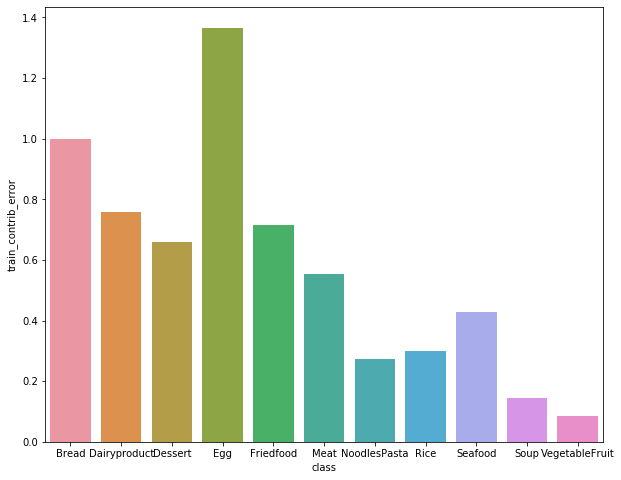

In [99]:
plt.figure(figsize=(10, 8))
sns.barplot(x='class', y='train_contrib_error', data=model_analysis)

### Observations:

Most of error in training data is due to Egg class. Its percent contribution in total error is 1.36%.

In [107]:
print("Total no of samples = {}".format(model_analysis.loc[3]['train_samples_count']))
print("Proportion samples = {}".format(model_analysis.loc[3]['proportion_training']))
print("Misclassified samples of Egg class = {}".format(model_analysis.loc[3]['train_wrongly_classified']))

Total no of samples = 986.0
Correctly classified samples = 9.993918508007297
Misclassified samples of Egg class = 224.0


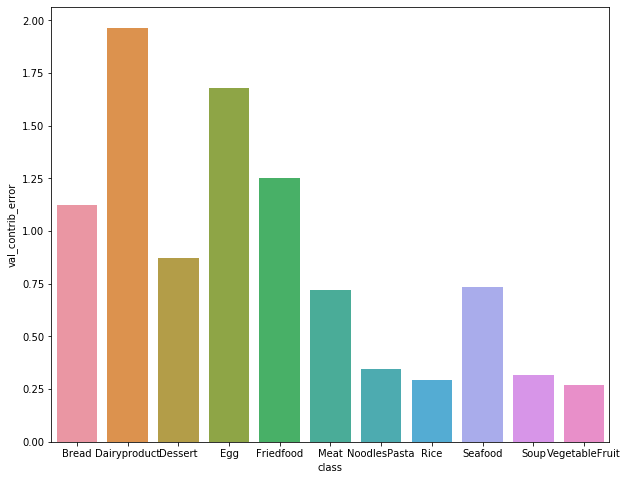

In [108]:
plt.figure(figsize=(10, 8))
sns.barplot(x='class', y='val_contrib_error', data=model_analysis)

### Observations:

Most of error in validation data is due to Dairyproduct class. Its percent contribution in total error is 1.965038%. Also error % of Egg class is 1.678755 which is second highest in validation data.

In [109]:
print("Total no of samples = {}".format(model_analysis.loc[3]['val_samples_count']))
print("Proportion samples = {}".format(model_analysis.loc[3]['proportion_validation']))
print("Misclassified samples of Egg class = {}".format(model_analysis.loc[3]['val_wrongly_classified']))

Total no of samples = 327.0
Correctly classified samples = 9.533527696793003
Misclassified samples of Egg class = 97.0


In [110]:
print("Total no of samples = {}".format(model_analysis.loc[1]['val_samples_count']))
print("Correctly classified samples = {}".format(model_analysis.loc[1]['proportion_validation']))
print("Misclassified samples of Dairyproduct class = {}".format(model_analysis.loc[1]['val_wrongly_classified']))

Total no of samples = 144.0
Correctly classified samples = 4.198250728862973
Misclassified samples of Dairyproduct class = 50.0


### Conclusion:

Let's focus on improving the error due to Egg class than Dairyproduct class as the model is yielding high error on both training as well as validation set.

Also the dataset has less proportion of samples of Dairyproduct class than Egg class so it is worth to improve the classification on 50 misclassified samples of Dairyproduct class than 97 misclassified samples of Egg class.

In [163]:
def preprocess_image(image):
    
    reshaped = image.reshape(1, 300, 300, 3)
    preprocessed = tf.keras.applications.vgg19.preprocess_input(reshaped)
    rescaled = preprocessed / 255
    return rescaled
    

In [164]:
def get_image(img_path):
    
    image = tf.keras.preprocessing.image.load_img(img_path, target_size=(300, 300))
    image = tf.keras.preprocessing.image.img_to_array(image)
    return image

In [169]:
def plot_misclassified_images(directory):
    
    image_list = os.listdir(directory)
    misclassified_count = 0
    plt.figure(figsize=(10, 10))
    
    for img in image_list:
        
        if misclassified_count == 16:
            break
        
        image = get_image(directory + img)
        preprocessed_image = preprocess_image(np.array(image))
        
        preds = np.argmax(model.predict(preprocessed_image))
        
        if preds != 3:
            misclassified_count = misclassified_count + 1
            plt.subplot(4, 4, misclassified_count)
            plt.imshow(image / 255)
    
    plt.show()

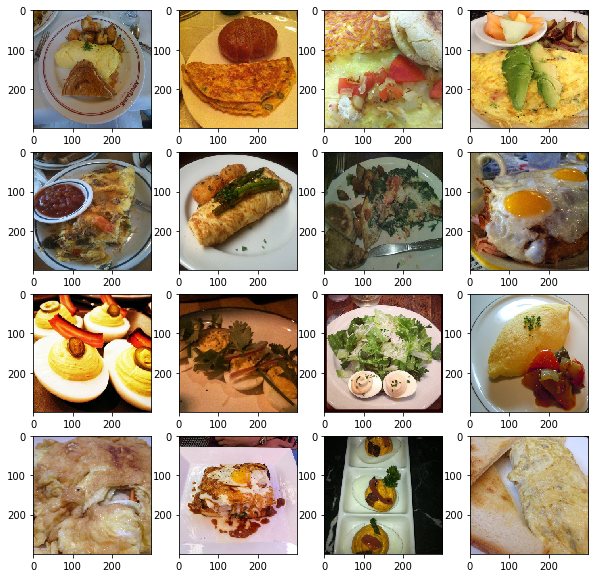

In [170]:
plot_misclassified_images('./training/Egg/')

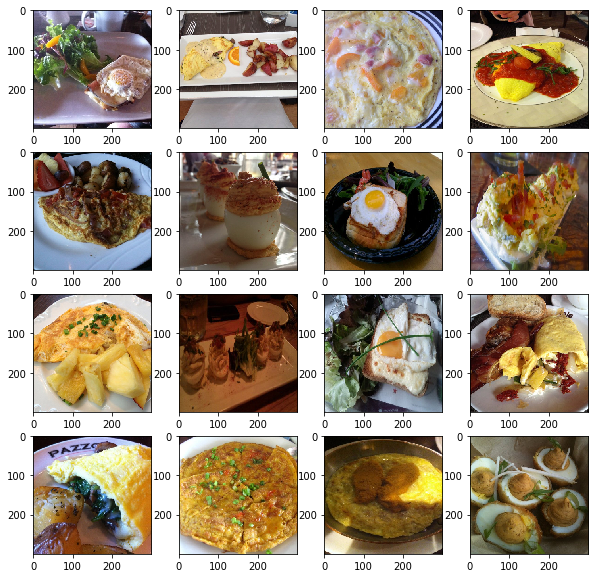

In [171]:
plot_misclassified_images('./validation/Egg/')

### Observations:

It appears the model is mistaking to identify foods like omelete etc. Let's see which class is assigned to misclassified samples.

In [181]:
def misclassified_samples(directory):
    
    predictions = []
    image_list = os.listdir(directory) 
    
    for img in image_list:
        
        image = get_image(directory + img)
        preprocessed_image = preprocess_image(image)
        
        preds = np.argmax(model.predict(preprocessed_image))
        
        if preds != 3:
            predictions.append(preds)
            
    return np.array(predictions)

In [182]:
%%time
training_misclassified = misclassified_samples('./training/Egg/')

Wall time: 2min 13s


In [187]:
training_misclassified = pd.DataFrame(training_misclassified, columns=['col'])

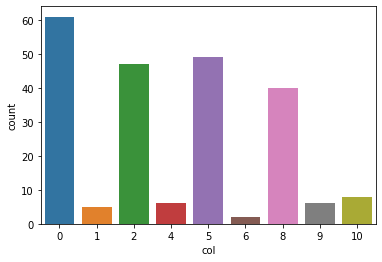

In [188]:
sns.countplot(x='col', data=training_misclassified)

### Observations:

Model is misclassifying eggs food as Bread, Meat and Dairyproduct. Let's plot some of the images which are classified in these classes. 

In [191]:
def plot_misclassified_class(directory, category):
    
    image_list = os.listdir(directory)
    plt.figure(figsize=(10, 10))
    misclassified_count = 0
    
    for img in image_list:
        
        if misclassified_count == 16:
            break
        
        image = get_image(directory + img)
        preprocessed_image = preprocess_image(np.array(image))
        
        preds = np.argmax(model.predict(preprocessed_image))
        
        if preds == category:
            misclassified_count = misclassified_count + 1
            plt.subplot(4, 4, misclassified_count)
            plt.imshow(image / 255)
    
    plt.show()

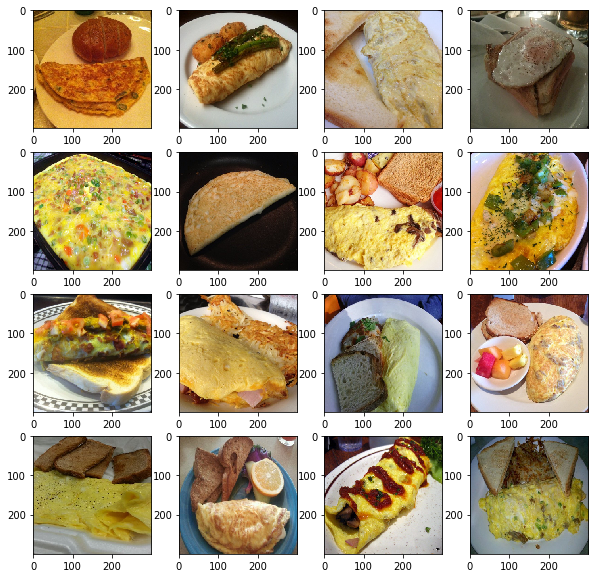

In [192]:
plot_misclassified_class('./training/Egg/', 0)

### Observations:

Model is assigning above images in Bread category as most of the images actually contain bread.

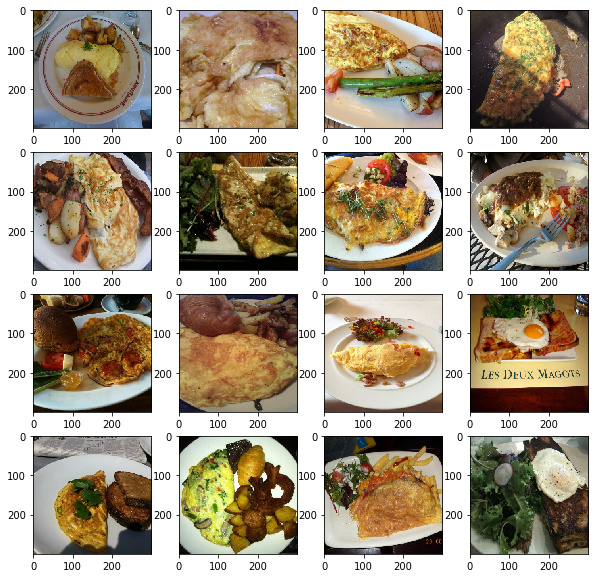

In [193]:
plot_misclassified_class('./training/Egg/', 5)

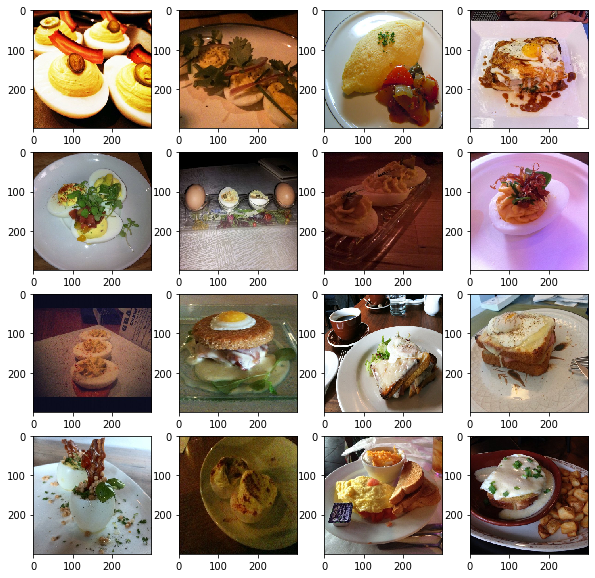

In [195]:
plot_misclassified_class('./training/Egg/', 2)

## Conclusion

Remove those images in eggs category which looks similar to other categories. This will improve the model further.